In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import random

In [2]:
#df = pd.read_csv('./data/ml-1m/ratings.dat',names=['UserId','MovieId','rating'],usecols=[0,1,2],dtype={'UserId':np.int64,'MovieId':np.int64},delimiter='::') 
df = pd.read_csv('./data/ml-10m/ml-10M100K/ratings.dat',names=['UserId','MovieId','rating'],usecols=[0,1,2],dtype={'UserId':np.int64,'MovieId':np.int64},delimiter='::') 

C:\Users\Matt\AppData\Local\Temp\ipykernel_20428\556088187.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('./data/ml-10m/ml-10M100K/ratings.dat',names=['UserId','MovieId','rating'],usecols=[0,1,2],dtype={'UserId':np.int64,'MovieId':np.int64},delimiter='::')


In [3]:
#movies_df = pd.read_csv('./data/ml-1m/movies.dat',delimiter='::',engine='python',encoding='ISO-8859-1',header=None,names=['ID','Title','Genres'])
movies_df = pd.read_csv('./data/ml-10m/ml-10M100K/movies.dat',delimiter='::',engine='python',encoding='ISO-8859-1',header=None,names=['ID','Title','Genres'])


In [4]:
movies_df.head()
#print(len(movies_df['Title'].unique()))

,ID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print(df.shape)
df.head()

(10000054, 3)


,UserId,MovieId,rating
0,1,122,5.0
1,1,185,5.0
2,1,231,5.0
3,1,292,5.0
4,1,316,5.0


In [6]:
R_mtx = df.pivot(index='UserId',columns='MovieId',values='rating')
R_mtx.head()

MovieId,1,2,3,4,5,6,7,8,9,10,...,65006,65011,65025,65027,65037,65088,65091,65126,65130,65133
UserId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
sparsity = (R_mtx.isna()).sum().sum() / R_mtx.size
print(sparsity)

0.9865966722939162


In [7]:
movie_averages = R_mtx.mean(axis=0,numeric_only=True)
user_averages = R_mtx.mean(axis=1,numeric_only=True)


R_avgFill = R_mtx.apply(lambda col: col.fillna(movie_averages[col.name]))

R_norm = R_avgFill.sub(user_averages,axis=0)

R_norm.head()



MovieId,1,2,3,4,5,6,7,8,9,10,...,65006,65011,65025,65027,65037,65088,65091,65126,65130,65133
UserId,,,,,,,,,,,,,,,,,,,,,
1,-1.071231,-1.791930,-1.849615,-2.139456,-1.922565,-1.186989,-1.634983,-1.868743,-2.003177,-1.571699,...,-1.000000,-1.000000,-3.000000,-2.500000,-1.583333,-1.937500,-1.333333,-1.333333,-2.750000,-1.642857
2,0.728769,0.008070,-0.049615,-0.339456,-0.122565,0.613011,0.165017,-0.068743,-0.203177,0.228301,...,0.800000,0.800000,-1.200000,-0.700000,0.216667,-0.137500,0.466667,0.466667,-0.950000,0.157143
3,-0.010625,-0.731324,-0.789009,-1.078850,-0.861959,-0.126383,-0.574377,-0.808137,-0.942571,-0.511093,...,0.060606,0.060606,-1.939394,-1.439394,-0.522727,-0.876894,-0.272727,-0.272727,-1.689394,-0.582251
4,-0.097547,-0.818246,-0.875931,-1.165772,-0.948881,-0.213305,-0.661298,-0.895059,-1.029493,-0.598015,...,-0.026316,-0.026316,-2.026316,-1.526316,-0.609649,-0.963816,-0.359649,-0.359649,-1.776316,-0.669173
5,-2.850575,-0.642505,-0.700190,-0.990030,-0.773140,-0.037564,-0.850575,-0.719318,-0.853752,-0.422273,...,0.149425,0.149425,-1.850575,-1.350575,-0.433908,-0.788075,-0.183908,-0.183908,-1.600575,-0.493432


In [8]:
movie_averages = movie_averages.to_numpy()
user_averages = user_averages.to_numpy()

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
R_norm_tensor = torch.tensor(R_norm.values, dtype=torch.float32, device=device)

In [10]:
U, S, Vh = torch.linalg.svd(R_norm_tensor, full_matrices=False)

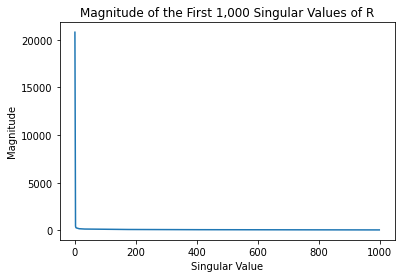

In [28]:
#look at the singular  values to see what a good value of k is
plt.plot(range(1000),S.cpu()[:1000])
plt.title('Magnitude of the First 1,000 Singular Values of R')
plt.ylabel('Magnitude')
plt.xlabel('Singular Value')
plt.show()

In [12]:
#may be a bit overkill but we will use the first 500 singular values for the low-rank approximation
k=500

U_k = U[:, :k]
S_k = S[:k]
Vh_k = Vh[:k, :]

S_sqrt = torch.diag(torch.sqrt(S_k))

users = (U_k @ S_sqrt).cpu().numpy()
movies = (S_sqrt @ Vh_k).cpu().numpy()


predicted_matrix = user_averages[:, np.newaxis] + users @ movies
print(predicted_matrix.shape)

(69878, 10677)


In [13]:
prediction_df = pd.DataFrame(predicted_matrix)
prediction_df.index = np.arange(1,prediction_df.shape[0] + 1)
prediction_df.columns = np.arange(1,prediction_df.shape[1] + 1)

movie_map = movies_df["Title"].to_dict()
prediction_df.rename(columns=movie_map, inplace=True)

prediction_df.head(20)

,Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),"American President, The (1995)",...,War of the Worlds (2005),War of the Worlds 2: The Next Wave (2008),Constantine's Sword (2007),Impulse (2008),Zona Zamfirova (2002),Double Dynamite (1951),"Death Kiss, The (1933)",Ben X (2007),Bedtime Stories (2008),Manhattan Melodrama (1934)
1,3.937188,3.243347,3.098586,2.938085,3.096685,3.782528,3.449531,3.170218,2.986888,3.454488,...,4.001402,4.001393,2.000967,2.501105,3.419012,3.063340,3.667299,3.667821,2.250719,3.356765
2,3.926355,3.211178,3.146133,2.863483,3.079915,3.805753,3.366167,3.120762,3.000153,3.423382,...,3.998911,3.998918,2.001669,2.500984,3.416492,3.062601,3.666263,3.666050,2.251266,3.356255
3,3.934267,3.213661,3.176371,2.849184,3.077932,3.782757,3.363552,3.128721,2.976766,3.424539,...,3.999142,3.999142,2.000527,2.500197,3.415565,3.062074,3.665875,3.665855,2.250131,3.355424
4,3.931052,3.221041,3.150166,2.863772,3.082201,3.810402,3.363465,3.124279,3.019236,3.440662,...,3.999822,3.999822,2.002369,2.501748,3.416982,3.064123,3.666882,3.666796,2.251891,3.357298
5,1.018801,3.210910,3.097891,2.830426,3.116477,3.806188,3.044610,3.168396,3.019012,3.436583,...,4.001168,4.001169,2.000668,2.500806,3.417785,3.064954,3.667850,3.667861,2.250495,3.358059
6,3.922226,3.186995,3.154750,2.865711,3.040215,3.823041,3.420072,3.125976,3.015428,3.443418,...,4.000595,4.000595,2.001259,2.501109,3.417520,3.064471,3.667375,3.667350,2.251088,3.356389
7,3.928963,3.195673,3.230023,2.838679,3.026375,3.818943,3.436610,3.129197,3.022655,3.427360,...,3.999548,3.999548,2.000998,2.500650,3.414860,3.063196,3.666262,3.666193,2.250996,3.356502
8,3.974982,2.493936,3.050235,2.878239,3.054070,4.025624,3.182004,3.195981,3.064725,3.449731,...,3.994690,3.994694,1.999797,2.498531,3.416174,3.055546,3.661346,3.662144,2.248653,3.351283
9,3.933418,3.212213,3.140272,2.843432,3.066904,3.814477,3.374949,3.143916,3.006570,3.437642,...,4.000903,4.000903,2.001068,2.501043,3.417197,3.061868,3.667371,3.667694,2.250712,3.359111
10,3.906009,3.217451,3.153286,2.848797,3.037382,3.790566,2.982247,3.141497,2.989877,3.442124,...,4.002695,4.002696,1.999749,2.500498,3.419337,3.064681,3.668538,3.668723,2.249743,3.358014


In [14]:
title_to_movieId = {title: mid for mid, title in movie_map.items()}

#recommendations here are based only on the movies with the highest predicted ratings that are also unrated by the user
def get_top_n_recs(user_id,n=10,verbose=False):


    # For a pivoted R_mtx, get the movie IDs that the user has rated.
    # This selects the row for the user and drops NaN values (movies not rated).
    rated_movie_ids = R_mtx.loc[user_id].dropna().index

    # Retrieve the prediction scores for the given user from predicted_df
    user_predictions = prediction_df.loc[user_id]

    # Create a mask: True for movies the user has NOT rated.
    # Since predicted_df columns are movie titles, map each title to its corresponding movieId.
    mask = [title_to_movieId.get(title) not in rated_movie_ids for title in user_predictions.index]

    # Filter the user's predictions to exclude movies already rated
    user_predictions_filtered = user_predictions[mask]

    # Sort the remaining predictions in descending order and select the top 10 recommendations
    top10_recommendations = user_predictions_filtered.sort_values(ascending=False).head(n)


    recommended_df = top10_recommendations.reset_index()
    recommended_df.columns = ['Title', 'predicted_score']

    # Clean movies_df by dropping duplicates (if any) based on the title,
    # so that the merge is clean.
    movies_clean = movies_df.drop_duplicates(subset='Title')

    # Merge the recommendations DataFrame with the movies DataFrame to add genre info.
    recommended_with_genres = recommended_df.merge(
        movies_clean[['Title', 'Genres']],
        on='Title',
        how='left'
    )

    
    if verbose:
        print(f"Top 10 Recommendations with Genres for User {user_id}:")
        display(recommended_with_genres)

    return recommended_df.head(n)

In [55]:
random.seed()

rand_user = random.randint(1,user_averages.shape[0])


get_top_n_recs(rand_user)

,Title,predicted_score
0,Panther (1995),5.003786
1,Snow White and the Seven Dwarfs (1937),5.003230
2,Satan's Tango (SÃ¡tÃ¡ntangÃ³) (1994),4.999715
3,Shrek the Halls (2007),4.999713
4,Shadows of Forgotten Ancestors (1964),4.999707
5,Sun Alley (Sonnenallee) (1999),4.999707
6,Fighting Elegy (Kenka erejii) (1966),4.999587
7,Stop Making Sense (1984),4.990239
8,Plan 9 from Outer Space (1959),4.984289
9,Guy (1997),4.951070


In [16]:
#find the cosine similarity between all users

cos_mtx = cosine_similarity(users)
cos_df = pd.DataFrame(cos_mtx,index=R_mtx.index,columns=R_mtx.index)
cos_df.head()

UserId,1,2,3,4,5,6,7,8,9,10,...,71558,71559,71560,71561,71562,71563,71564,71565,71566,71567
UserId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.071292,0.747550,0.647945,0.527746,0.674564,0.609275,0.049529,0.693072,0.513185,...,0.413177,0.708667,0.235783,0.738201,0.574725,0.179573,-0.219661,0.535758,0.613005,-0.046650
2,-0.071292,1.000000,0.273567,0.229471,0.285120,0.264524,0.236920,0.224014,0.222395,0.280640,...,0.225179,0.163252,0.402359,0.120448,0.212344,0.429695,0.474058,0.251913,0.326771,0.577640
3,0.747550,0.273567,1.000000,0.685240,0.617877,0.777512,0.700886,0.224859,0.742337,0.640243,...,0.479576,0.734006,0.439458,0.751468,0.671715,0.376693,0.067179,0.626976,0.757054,0.243783
4,0.647945,0.229471,0.685240,1.000000,0.513706,0.619421,0.569923,0.129411,0.619353,0.508564,...,0.408205,0.595569,0.456082,0.640029,0.540778,0.308194,0.023605,0.530404,0.634172,0.184237
5,0.527746,0.285120,0.617877,0.513706,1.000000,0.575739,0.518294,0.138938,0.531446,0.574765,...,0.325260,0.538226,0.328786,0.519197,0.491627,0.326761,0.068423,0.487692,0.537448,0.178164


In [17]:
def top_n_recomendations_from_neighbors(user_id,num_users=10,num_recs=10,verbose=False):
    #these recommendations are based on the highest rated movies from similar users


    sim_users = cos_df.loc[user_id].drop(user_id)
    top_neighbors = sim_users.sort_values(ascending=False).head(num_users).index
    neighbor_ratings = R_mtx.loc[top_neighbors]
    neighbor_avg_ratings = neighbor_ratings.mean(axis=0)
    user_rated_movies = R_mtx.loc[user_id].dropna().index
    candidate_movies = neighbor_avg_ratings.drop(user_rated_movies, errors='ignore')
    top_candidate_movies = candidate_movies.sort_values(ascending=False).head(num_recs)
    recommended_df = top_candidate_movies.reset_index()
    recommended_df.columns = ['movieId', 'avg_rating']
    recommended_df = recommended_df.merge(movies_df,left_on='movieId',right_on='ID',how='left')
    recommended_df.drop('movieId',axis=1,inplace=True)
    recommended_df['predicted_rating'] = recommended_df['Title'].apply(
        lambda title: prediction_df.loc[user_id, title] if title in prediction_df.columns else np.nan
    )
    recommended_df.sort_values(by='avg_rating', ascending=False, inplace=True)

    if verbose:
        print(f"top {num_recs} recomendations for user {user_id}:")
        display(recommended_df)
    return recommended_df
    

In [18]:
rand_user = random.randint(1,user_averages.shape[0])


top_n_recomendations_from_neighbors(rand_user)

,avg_rating,ID,Title,Genres,predicted_rating
0,5.0,3543,Diner (1982),Comedy|Drama,2.451864
1,5.0,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,2.551072
2,5.0,58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,3.354031
3,5.0,2609,"King of Masks, The (Bian Lian) (1996)",Drama,3.016815
4,5.0,1244,Manhattan (1979),Comedy|Drama|Romance,4.004217
5,5.0,3374,Daughters of the Dust (1991),Drama,3.160581
6,5.0,1211,Wings of Desire (Der Himmel Ã¼ber Berlin) (1987),Comedy|Drama|Fantasy|Romance,3.981594
7,5.0,1959,Out of Africa (1985),Drama|Romance,3.681606
8,5.0,6953,21 Grams (2003),Drama|Mystery|Romance,2.873131
9,5.0,3730,"Conversation, The (1974)",Drama|Mystery,3.301715


In [19]:
top_n_recomendations_from_neighbors(861,num_users=100)

,avg_rating,ID,Title,Genres,predicted_rating
0,5.0,3978,"Legend of Bagger Vance, The (2000)",Drama|Romance,2.788713
1,5.0,42094,"Spirit of the Beehive, The (EspÃ­ritu de la co...",Drama|Horror|Mystery,3.826978
2,5.0,4705,"Cage aux Folles, La (1978)",Comedy,3.555683
3,5.0,7234,"Strada, La (1954)",Drama,1.667238
4,5.0,4690,"Cotton Club, The (1984)",Crime|Musical,2.999556
5,5.0,3469,Inherit the Wind (1960),Drama,4.150959
6,5.0,1687,"Jackal, The (1997)",Action|Thriller,3.117654
7,5.0,492,Manhattan Murder Mystery (1993),Comedy|Mystery,3.397358
8,5.0,3476,Jacob's Ladder (1990),Drama|Fantasy|Horror|Mystery|Thriller,3.959058
9,5.0,3526,Parenthood (1989),Comedy|Drama,3.056936


In [ ]:
#evaluating the predictions

Ratings = R_avgFill.values
Predictions = prediction_df.values

diff = Ratings - Predictions

frob_norm = np.linalg.norm(diff,ord='fro')

N=diff.size
print(N)
rmse = frob_norm/np.sqrt(N)

print(f"RMSE between user ratings and predictions from low-rank approximation: {rmse}")

RMSE between user ratings and predictions from low-rank approximation: 0.07248564787344437


In [60]:
mae = np.mean(np.abs(diff))
print(mae)

0.015681879105246564


In [56]:
print(N)

746087406


In [ ]:
#now let's see how our recommendations cover the entire set of movies
#coverage := (# unique titles in recommendations)/(total number of movies)
user_IDs = df['UserId'].unique().tolist()
recs_list = []

for user in user_IDs[:69879]:
    recs = top_n_recomendations_from_neighbors(user,num_recs=10,num_users=100)
    titles = recs['Title'].tolist()

    recs_list.append({'userID':user,
                     'recommended titles':titles
                     })


KeyError: 69879

In [24]:
recs_df = pd.DataFrame(recs_list)
unique_recommended = set(
    item 
    for recs in recs_df['recommended titles'] 
    for item in recs
)
coverage = len(unique_recommended)/R_mtx.shape[1]

print(f"item coverage {coverage}")

item coverage 0.618244825325466


In [ ]:
#now lets compare this to the coverage from our other recommendation method
recs_list_from_SVD = []
for user in user_IDs:
    recs = get_top_n_recs(user,n=10)
    titles = recs['Title'].tolist()

    recs_list_from_SVD.append({'userID':user,
                     'recommended titles':titles
                     })



KeyError: 69879

In [26]:
recs_df_from_SVD = pd.DataFrame(recs_list_from_SVD)
unique_recommended_from_SVD = set(
    item 
    for recs in recs_df_from_SVD['recommended titles'] 
    for item in recs
)
coverage_from_SVD = len(unique_recommended_from_SVD)/R_mtx.shape[1]

print(f"item coverage {coverage_from_SVD}")

item coverage 0.06584246511192282
